# 0. Setup

## 0.1. standard imports

In [1]:
'''standard imports'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime
import os

## 0.2. `asf_search` setup

In [2]:
'''
asf_search
documentation: https://docs.asf.alaska.edu/asf_search/basics/
'''
import asf_search as asf

print(f'asf_search version: {asf.__version__}')
asf.REPORT_ERRORS = False # asf_search automatically reports search errors to ASF -- opt out with this line

asf_search version: 6.6.3


## 0.3. utils

In [3]:
'''utils'''

from typing import Union, List
from pathlib import Path

def get_path(*args: Union[str, List[str]]) -> str:
    """
    Join all arguments into a single path specific to your system.
    
    Parameters:
        - Use 'current' to get the directory this file (the one calling this function) is in.
            - NOTE: if you want to get the directory of the file that called the function that called this function, use `Path(__file__).resolve().parent`.
        - Use '..' to navigate to the parent directory.
    
    Returns:
        str: The absolute path formed by joining the input arguments.
        
    Example:
        If you're running a script/notebook in `/src/main/`, you can get the path to `/src/data/foo.txt` with:
            `get_path('current', '..', 'data', 'foo.txt')`            
    """
    parts = []
    for arg in args:
        if isinstance(arg, List):
            parts.extend(arg)
        else:
            parts.append(arg)

    # Replace 'current' with the current working directory
    parts = [Path.cwd() if part == 'current' else Path(part) for part in parts]
    
    # Join all parts and resolve to get the absolute path
    return str(Path(*parts).resolve())




def print_dict(d: dict, indent=0, format_pastable=False, condense_arrays=True) -> None:
    """
    DESCRIPTION:
    ------------
        Cleaner way to print a dictionary. Optionally condenses numpy arrays into a shape descriptor.

    PARAMETERS:
    ------------
        d : dict
            The dictionary to print.
        indent : int
            The current indentation level.
        format_pastable : bool
            If True, will format the output so that it can be pasted into a python script as an assignment to a variable.
        condense_arrays : bool
            If True, condenses numpy arrays into a shape descriptor rather than printing each element.
    """
    for key, value in d.items():
        spacing = '\t' * indent
        key_repr = f"'{key}'" if isinstance(key, str) else key
        if isinstance(value, dict):
            print(f"{spacing}{key_repr}")
            print_dict(value, indent+1, format_pastable, condense_arrays)
        elif isinstance(value, np.ndarray) and condense_arrays:
            print(f"{spacing}{key_repr}")
            print(f"{spacing}\t<np.ndarray, shape={value.shape}>")
        elif format_pastable:
            value_repr = f"'{value}'" if isinstance(value, str) else value
            print(f"{spacing}{key_repr}: {value_repr!r},")
        else:
            value_repr = f"'{value}'" if isinstance(value, str) else value
            print(f"{spacing}{key_repr}")
            print(f"{spacing}\t{value_repr}")



def printsep(n=100):
    print()
    print('-' * n)
    print()



# def yq2dt(year_quarter_str):
#     '''Convert a 'year-quarter' string (e.g. 'Y2019Q1') to a datetime object for the first day of the quarter.'''

#     # Extract year and quarter
#     year = int(year_quarter_str[1:5])
#     quarter = int(year_quarter_str[-1])
    
#     # Map quarter to the first month of the quarter
#     month = (quarter - 1) * 3 + 1
    
#     # Create datetime object for the first day of the corresponding month
#     return datetime(year, month, 1)





# def get_size(obj):
#     import sys
#     """Recursively find size of objects in bytes"""
#     if isinstance(obj, dict):
#         return sum((get_size(v) for v in obj.values())) + sum((get_size(k) for k in obj.keys())) + sys.getsizeof(obj)
#     elif isinstance(obj, list) or isinstance(obj, tuple) or isinstance(obj, set):
#         return sum((get_size(i) for i in obj)) + sys.getsizeof(obj)
#     elif isinstance(obj, np.ndarray):
#         return obj.nbytes + sys.getsizeof(obj)
#     else:
#         return sys.getsizeof(obj)       




# import cartopy.geodesic as gd
# def distance_km(p1, p2):
#     x, y, _ = gd.Geodesic().inverse(p1, p2)[0]
#     return np.linalg.norm([x,y]) / 1.e3




# # Function to convert Unix timestamp (milliseconds) to a readable date
# def unix_to_datetime(unix_time_ms):
#     return datetime.fromtimestamp(unix_time_ms / 1000, timezone.utc)



tab = '\t'

## 0.4. repo/data paths

In [4]:
dirpath_repo = r'C:\Users\Eris\Documents\sync_local\01_Research\wind'

In [5]:
'''
Metadata on various wind farms (coords, capacity, etc.)
    https://drive.google.com/drive/folders/1t4UKE1Xo6-_OaTlvJFUHIhXDvVkI99jU?usp=sharing
'''

owf_metadata = pd.read_csv(
    get_path(dirpath_repo, 'data', '1_raw', 'owf_metadata', 'owf_metadata.csv')
)


## formatting
owf_metadata['start_operation_APPROX'] = pd.to_datetime(owf_metadata['start_operation_APPROX'], format='%Y-%m-%d')
owf_metadata = owf_metadata.to_dict('index')
owf_metadata = {v['name']: v for k, v in owf_metadata.items()}

print_dict(owf_metadata)

'Hornsea Project One'
	'name'
		'Hornsea Project One'
	'lon'
		1.791111
	'lat'
		53.885
	'num_turbines'
		174
	'capacity_mw'
		1218.0
	'start_operation_APPROX'
		2019-02-01 00:00:00
	'lon_left'
		1.64
	'lon_right'
		2.25
	'lat_bottom'
		53.82
	'lat_top'
		53.98
'Horns Rev 3'
	'name'
		'Horns Rev 3'
	'lon'
		7.669167
	'lat'
		55.696944
	'num_turbines'
		49
	'capacity_mw'
		407.0
	'start_operation_APPROX'
		2019-08-22 00:00:00
	'lon_left'
		nan
	'lon_right'
		nan
	'lat_bottom'
		nan
	'lat_top'
		nan
'Horns Rev 1'
	'name'
		'Horns Rev 1'
	'lon'
		7.9833
	'lat'
		55.5333
	'num_turbines'
		80
	'capacity_mw'
		160.0
	'start_operation_APPROX'
		2002-12-11 00:00:00
	'lon_left'
		nan
	'lon_right'
		nan
	'lat_bottom'
		nan
	'lat_top'
		nan
'Anholt'
	'name'
		'Anholt'
	'lon'
		11.21
	'lat'
		56.6
	'num_turbines'
		111
	'capacity_mw'
		nan
	'start_operation_APPROX'
		2013-09-04 00:00:00
	'lon_left'
		11.138
	'lon_right'
		11.333
	'lat_bottom'
		56.498
	'lat_top'
		56.712


---
# 1. Search with Parameters

In [6]:
'''choose a wind farm'''

# this_owf = owf_metadata['Hornsea Project One']
this_owf = owf_metadata['Anholt']

## NOTE: end user input

print_dict(this_owf)

'name'
	'Anholt'
'lon'
	11.21
'lat'
	56.6
'num_turbines'
	111
'capacity_mw'
	nan
'start_operation_APPROX'
	2013-09-04 00:00:00
'lon_left'
	11.138
'lon_right'
	11.333
'lat_bottom'
	56.498
'lat_top'
	56.712


In [7]:
'''(for given search parameters) -- see total num available data products'''

# full list of search options here: https://docs.asf.alaska.edu/asf_search/searching/

search_params = {
    'platform': asf.PLATFORM.SENTINEL1,
    'processingLevel': asf.PRODUCT_TYPE.OCN,
    'intersectsWith': f'POINT({this_owf["lon"]} {this_owf["lat"]})',
    # 'start': '2018-01-01', # start of Honrnsea Project One construction
    # 'end': '2024-01-01',
    'start': '2019-12-01', 
    'end': '2020-02-01', 
    # 'maxResults': 10, # limit number of results if you just want to peek
}

## NOTE: end user input


count = asf.search_count(**search_params)
print(f'{count} data products availabe for given search parameters')

10 data products availabe for given search parameters


In [8]:
'''perform search'''

results = asf.search(**search_params)

from asf_search.exceptions import ASFSearchError
try:
    results.raise_if_incomplete()
except ASFSearchError as e:
    print(e)
    raise Exception('Search incomplete -- retrying usually works')

### WARNING: CAN TAKE UP TO 1 MIN TO RUN

In [9]:
'''sort results in chronological order of measurement'''

results = sorted(results, key=lambda obj: datetime.strptime(obj.properties['startTime'], '%Y-%m-%dT%H:%M:%S.%fZ'))

---
# 2. Peek/Pre-explore Search Results

Average time between measurements 	= 5 days.
Median time between measurements 	= 1 days.
Maximum time between measurements 	= 10 days.


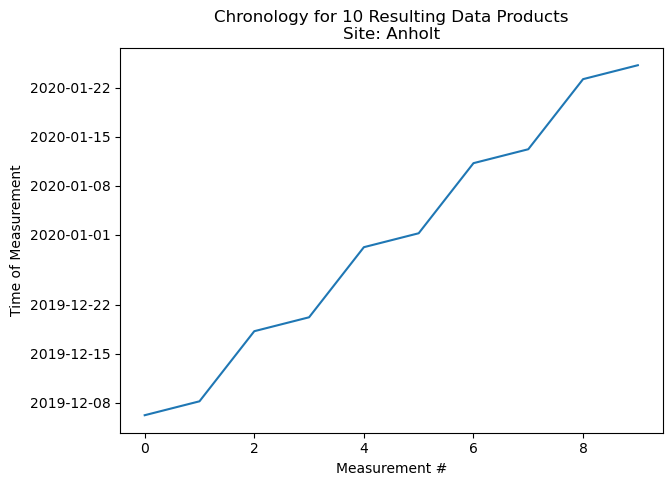

In [10]:
'''timeline of measurements'''

t_measured_str = [obj.properties['startTime'] for obj in results]
t_measured_dt = [datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S.%fZ') for date_str in t_measured_str]



fig = plt.figure(figsize=(7,5))
ax = plt.axes()

ax.plot(t_measured_dt)
# ax.scatter(np.arange(len(start_times_obj)), start_times_obj)

title1 = f'Chronology for {len(t_measured_dt)} Resulting Data Products'
title2 = f'Site: {this_owf["name"]}'
ax.set_title(f'{title1}\n{title2}')

ax.set_xlabel('Measurement #')
# ax.set_xticks(np.arange(len(start_times_obj)))
ax.set_ylabel('Time of Measurement')



'''sampling rate'''

from datetime import timedelta

# Calculate the time difference between consecutive datetime objects
time_diffs = [(t_measured_dt[i+1] - t_measured_dt[i]) for i in range(len(t_measured_dt)-1)]

# Get max time difference between consecutive measurements
max_diff = max(time_diffs)

# Calculate the average difference
avg_diff = sum(time_diffs, timedelta()) / len(time_diffs)

# Calculate the median difference
sorted_diffs = sorted(time_diffs)
length = len(sorted_diffs)
if length % 2 == 1:
    median_diff = sorted_diffs[length // 2]
else:
    median_diff = (sorted_diffs[length // 2 - 1] + sorted_diffs[length // 2]) / 2

print(f"Average time between measurements \t= {avg_diff.days} days.")
print(f"Median time between measurements \t= {median_diff.days} days.")
print(f"Maximum time between measurements \t= {max_diff.days} days.")

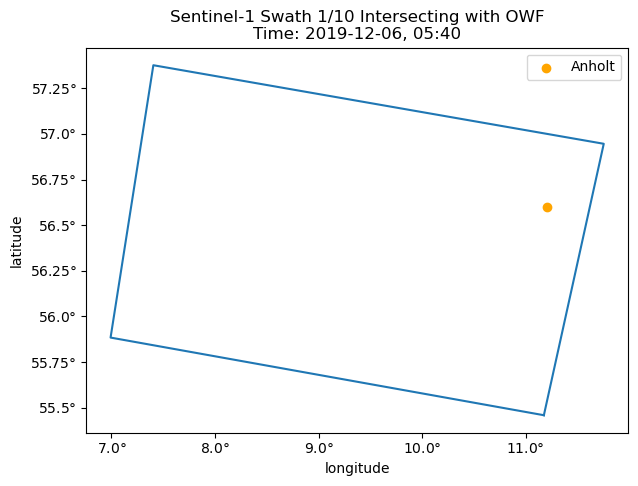

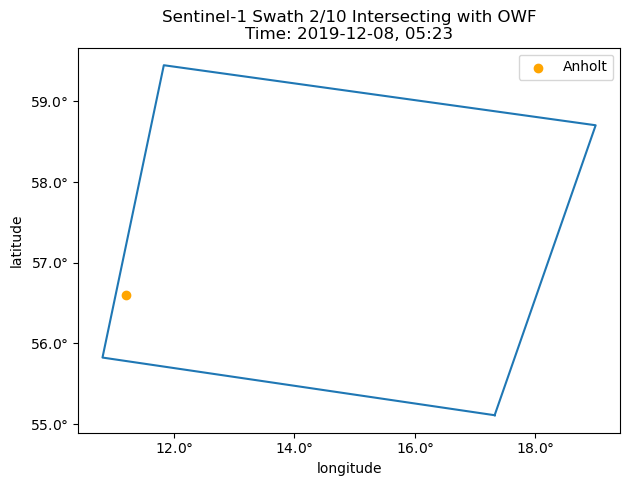

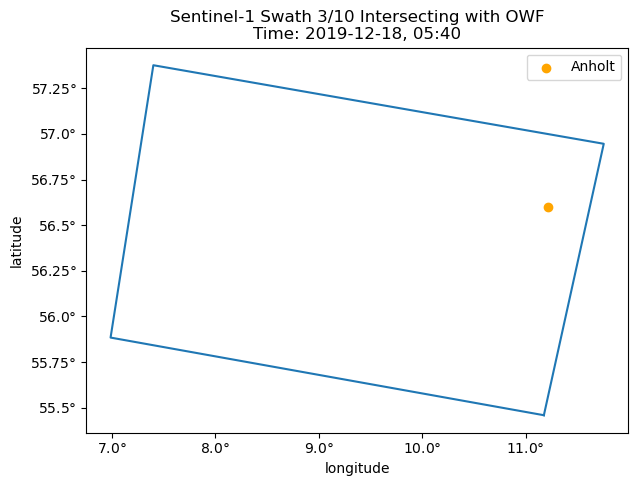

In [11]:
'''plot satellite swaths on map'''

max_plots = 3

## NOTE: end user input

plotting_range = len(results)

if plotting_range > max_plots:
    print(f'WARNING: Num data products exceeds `max_plots={max_plots}` threshold.')
    plotting_range = max_plots


for i in range(plotting_range):

    dat_coords = np.asarray(results[i].geometry['coordinates'][0])
    dat_lon = dat_coords[:,0]
    dat_lat = dat_coords[:,1]



    fig = plt.figure(figsize=(7,5))
    ax = plt.axes()

    ax.plot(dat_lon, dat_lat)
    # ax.scatter(dat_lon, dat_lat)
    ax.scatter(this_owf["lon"], this_owf["lat"], label=f'{this_owf["name"]}', color='orange')
    ax.legend()

    title1 = f'Sentinel-1 Swath {i+1}/{len(results)} Intersecting with OWF'

    date_str = results[i].properties['startTime']
    date_obj = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S.%fZ')
    formatted_date = date_obj.strftime('%Y-%m-%d, %H:%M')
    title2 = f'Time: {formatted_date}'

    ax.set_title(f'{title1}\n{title2}')

    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.xaxis.set_major_formatter(r'{x}$\degree$')
    ax.yaxis.set_major_formatter(r'{x}$\degree$')

---
# 3. Download Subset of Results

NOTE: this requires a `.netrc` file (or `_netrc` for Windows) in the home directory with the following format:


```
machine urs.earthdata.nasa.gov
login <asf username>
password <asf password>
```

In [12]:
'''target directory for this dataset'''

dirpath_thisdata = get_path(
    dirpath_repo, 
    'data', 
    '1_raw', 
    'asf_search', 
    f'{this_owf["name"]}', 
    f'{search_params["platform"]}_{search_params["processingLevel"]}'
)

dirpath_zipped = get_path(dirpath_thisdata, 'raw_zipped')
dirpath_unzipped = get_path(dirpath_thisdata, 'raw_unzipped')

In [13]:
'''select a time range, get results, and download'''

count = asf.search_count(**search_params)
print(f'{count} data products availabe for given search parameters')





'''perform search'''

results = asf.search(**search_params)

from asf_search.exceptions import ASFSearchError
try:
    results.raise_if_incomplete()
except ASFSearchError as e:
    print(e)
    raise Exception('Search failed -- retry in a few seconds.')


# print('Search completed. Would you like to continue with download? (y/n)')
# ask = input('(y/n): ')
# if ask != 'y':
#     print('aborting...')
#     raise Exception('aborted')
print()





'''download'''

os.makedirs(dirpath_zipped, exist_ok=True)

existing_files = set()
for filename_zipped in os.listdir(dirpath_zipped):
    existing_files.add(filename_zipped)

for i, result in enumerate(results):
    print(f'\t- Downloading {i+1}/{len(results)}: {result.properties["fileName"]}\t', end='')
    if result.properties['fileName'] not in existing_files:
        result.download(path=dirpath_zipped)
        print('...done')
    else:
        print('...skipping (already exists)')

print('\nDownload complete.')

10 data products availabe for given search parameters

	- Downloading 1/10: S1B_EW_OCN__2SDH_20200125T052259_20200125T052359_019969_025C62_C9C3.zip	...done
	- Downloading 2/10: S1B_IW_OCN__2SDV_20200123T054001_20200123T054026_019940_025B80_2A9A.zip	...done
	- Downloading 3/10: S1B_EW_OCN__2SDH_20200113T052259_20200113T052400_019794_0256CC_871B.zip	...done
	- Downloading 4/10: S1B_IW_OCN__2SDV_20200111T054001_20200111T054026_019765_0255EE_80E4.zip	...done
	- Downloading 5/10: S1B_EW_OCN__2SDH_20200101T052259_20200101T052400_019619_025145_32D0.zip	...done
	- Downloading 6/10: S1B_IW_OCN__2SDV_20191230T054001_20191230T054026_019590_02505C_BFE9.zip	...done
	- Downloading 7/10: S1B_EW_OCN__2SDH_20191220T052300_20191220T052401_019444_024BAE_9081.zip	...done
	- Downloading 8/10: S1B_IW_OCN__2SDV_20191218T054002_20191218T054027_019415_024ACE_92DB.zip	...done
	- Downloading 9/10: S1B_EW_OCN__2SDH_20191208T052301_20191208T052401_019269_024618_1F05.zip	...done
	- Downloading 10/10: S1B_IW_OCN__2S

In [14]:
'''unzip'''
print(f'Unzipping files in {dirpath_zipped}... ({len(os.listdir(dirpath_zipped))} files)')


os.makedirs(dirpath_unzipped, exist_ok=True)

import zipfile
for i, filename_zipped in enumerate(os.listdir(dirpath_zipped)):

    print(f'\t- Unzipping {i+1}/{len(os.listdir(dirpath_zipped))}: {filename_zipped}\t', end='')

    if os.path.isdir(get_path(dirpath_unzipped, os.path.splitext(filename_zipped)[0])):
        print('...skipping (already exists)')
    else:
        filepath_zipped = get_path(dirpath_zipped, filename_zipped)
        # print(filepath_rawzipped)
        with zipfile.ZipFile(filepath_zipped, 'r') as zip_ref:
            zip_ref.extractall(dirpath_unzipped)
        print('...done')


'''NOTE: if you get an error "file is not a zip file", it likely means you interrupted that download and the file is corrupted. Delete the file and try again.'''

print(f'\nFinished unzipping to:\n{dirpath_unzipped}')

Unzipping files in C:\Users\Eris\Documents\sync_local\01_Research\wind\data\1_raw\asf_search\Anholt\Sentinel-1_OCN\raw_zipped... (10 files)
	- Unzipping 1/10: S1B_EW_OCN__2SDH_20191208T052301_20191208T052401_019269_024618_1F05.zip	...done
	- Unzipping 2/10: S1B_EW_OCN__2SDH_20191220T052300_20191220T052401_019444_024BAE_9081.zip	...done
	- Unzipping 3/10: S1B_EW_OCN__2SDH_20200101T052259_20200101T052400_019619_025145_32D0.zip	...done
	- Unzipping 4/10: S1B_EW_OCN__2SDH_20200113T052259_20200113T052400_019794_0256CC_871B.zip	...done
	- Unzipping 5/10: S1B_EW_OCN__2SDH_20200125T052259_20200125T052359_019969_025C62_C9C3.zip	...done
	- Unzipping 6/10: S1B_IW_OCN__2SDV_20191206T054002_20191206T054027_019240_024537_BB5D.zip	...done
	- Unzipping 7/10: S1B_IW_OCN__2SDV_20191218T054002_20191218T054027_019415_024ACE_92DB.zip	...done
	- Unzipping 8/10: S1B_IW_OCN__2SDV_20191230T054001_20191230T054026_019590_02505C_BFE9.zip	...done
	- Unzipping 9/10: S1B_IW_OCN__2SDV_20200111T054001_20200111T054026_